In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/Users/afloresep/work/ClusterMol/data/DB_corrected.csv')

In [ ]:
from molclust.fingerprints import FingerprintCalculator

fp_calc = FingerprintCalculator()
mqn = fp_calc.FingerprintFromSmiles(smiles = df['SMILES'], fp= 'mqn')

pca = PCA(n_components=3).fit_transform(mqn)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from molclust.fingerprints import FingerprintCalculator
import plotly.express as px

# # 1. Load & fingerprint (you already have this)
# df = pd.read_csv('/Users/afloresep/work/ClusterMol/data/DB_corrected.csv')
# fp_calc = FingerprintCalculator()
# mqn = fp_calc.FingerprintFromSmiles(smiles=df['SMILES'], fp='mqn')

# # 2. Whiten PCA for equalized variances (often spreads axes more uniformly)
# pca = PCA(n_components=3, whiten=True).fit_transform(mqn)

# # 3. Optional jitter to de-overlap exact ties
# jitter = np.random.normal(scale=0.02, size=pca.shape)
# pca_j = pca + jitter

# 4. Build a DataFrame for easy mapping
pc_df = pd.DataFrame(pca_j, columns=['PC1','PC2','PC3'])
pc_df['cluster'] = df.get('cluster', pd.Categorical(df.index))  # or any label

# 5. Plot
fig = px.scatter_3d(
    pc_df, x='PC1', y='PC2', z='PC3',
    color='cluster',                 # color by cluster (or drop for single-color)
    hover_data={'PC1':True,'PC2':True,'PC3':True},
    opacity=0.8,                     # slightly transparent
    size_max=4,                      # maximum marker size
    width=800, height=600,
    title='Interactive 3D PCA (MQN) with Whiten & Jitter'
)
fig.update_traces(marker=dict(symbol='circle', size=3))
import plotly.io as pio
pio.renderers.default = "browser"

# now when you do:
fig.show()
# it will launch in your default web browserfig.show()

In [ ]:
with open('/Users/afloresep/Downloads/Welab_Chemical library.sdf') as file:
        lines = [line for line in file]

In [ ]:
from rdkit import Chem
import pandas as pd

# 1) Point to your SDF file
sdf_path = "/Users/afloresep/Downloads/Welab_Chemical library.sdf"

# 2) Create an SD Mol supplier
suppl = Chem.SDMolSupplier(sdf_path, sanitize=True, removeHs=False)

# 3) Iterate and convert
smiles = []
for i, mol in enumerate(suppl):
    if mol is None:
        # skip molecules that failed sanitization/parsing
        continue
    smi = Chem.MolToSmiles(mol, isomericSmiles=True)
    smiles.append(smi)

# 4) (Optional) Save to a CSV or text file
df = pd.DataFrame({"SMILES": smiles})
df.to_csv("output_smiles.csv", index=False)
# or, for a simple list:
with open("output_smiles.txt", "w") as f:
    for smi in smiles:
        f.write(smi + "\n")

3775

In [33]:
from rdkit.Chem import AllChem, rdChemReactions
from rdkit import Chem
path='/Users/afloresep/Downloads/diamines_canonical.txt'
from rdkit import Chem
with open(path) as fh:
    diamines = [Chem.MolFromSmiles(line.strip()) for line in fh if line.strip()]

# reaction SMARTS (SMIRKS) with atom-maps
rxn_smarts = "[CH2:1]-[NX3;H2:2]>>[C:1](=[O])-[N:2]"

rxn = rdChemReactions.ReactionFromSmarts(rxn_smarts)

def enumerate_variants(mol, max_amides=2):
    # find all eligible CH2-N bonds
    matches = mol.GetSubstructMatches(Chem.MolFromSmarts("[CH2]-[NH2]"))
    variants = {Chem.MolToSmiles(mol, isomericSmiles=True)}   # 0-amide case

    # choose 1 or 2 distinct CH2 groups, but at most one per nitrogen
    from itertools import combinations
    for k in (1, 2):
        for combo in combinations(matches, k):
            # skip if any N appears twice (would give imide)
            if len({m[1] for m in combo}) < k:
                continue
            m2 = Chem.RWMol(mol)
            for c_idx, n_idx in combo:
                ps = rxn.RunReactants((m2,))[0]  # single-step
                m2 = ps  # next substitution on the freshly modified mol
            smi = Chem.MolToSmiles(m2, isomericSmiles=True)
            variants.add(smi)
    return variants

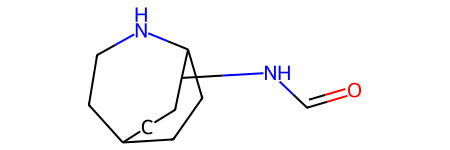

In [320]:
# for s in smiles:jj
Chem.MolFromSmiles(smiles[7])

In [308]:
with open('diamines_amide_library.txt', 'r') as file:
    smiles = [smi.split('\n')[0] for smi in file]

# # smiles
# # Chem.MolFromSmiles(smiles[7])
# # with open('diamines_amide_library.txt', 'w') as file:
# #     for i in range(len(smiles)):
# #         print(i)
# #         for j in range(len(rms[i])):
# #             print(i,j)
# len(smiles)

In [290]:
from rdkit.Chem.Draw import rdMolDraw2D

from rdkit.Chem.Draw import IPythonConsole

m = Chem.MolFromSmiles(smiles[5])
print(m.GetSubstructMatches(Chem.MolFromSmarts('[NH2]')))

# m = AllChem.ReplaceSubstructs(Chem.MolFromSmiles(smiles[0]), Chem.MolFromSmarts('[N]'), Chem.MolFromSmarts('[NX3][CX3](=[OX1])'))
# m = Chem.MolFromSmiles('CC(=O)O')
# patt = Chem.MolFromSmarts('C(=O)[OH]')
# rm = AllChem.DeleteSubstructs(Chem.MolFromSmilessmiles[5],patt)


repl = Chem.MolFromSmarts('[NX3][CX3](=[OX1])')
patt = Chem.MolFromSmarts('[NH2]')
m = Chem.MolFromSmiles('CC(=O)N')
rms = [Chem.rdmolops.ReplaceSubstructs(Chem.MolFromSmiles(i),patt,repl) for i in smiles]
all_rms = [Chem.rdmolops.ReplaceSubstructs(Chem.MolFromSmiles(i),patt,repl, replaceAll=True) for i in smiles]
# Chem.MolToSmiles(rms[0])
with open('diamines_amide_library.txt', 'w') as file:
    for i in range(len(smiles)):
        file.write(f'{Chem.MolToSmiles(all_rms[i][0])}\n')
        for j in range(len(rms[i])):
            file.write(f'{Chem.MolToSmiles(rms[i][j])}\n')
        file.write(f'{smiles[i]}') 

# # smi = smiles[0]
# # mol = Chem.MolFromSmiles(smi)
# # patt = Chem.MolFromSmarts("[N]")
# # hit_ats = list(mol.GetSubstructMatch(patt))
# # hit_bonds = []
# # for bond in patt.GetBonds():
# #    aid1 = hit_ats[bond.GetBeginAtomIdx()]
# #    aid2 = hit_ats[bond.GetEndAtomIdx()]
# #    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

# # for bond in patt.GetBonds():
# #     aid1 = hit_ats[bond.GetBeginAtomIdx()]
# #     aid2 = hit_ats[bond.GetEndAtomIdx()]
# #     hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

# # colours = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]
# # atom_cols = {}

# # for i, at in enumerate(hit_ats):
# #     atom_cols[at] = colours[i%4]
# # bond_cols = {}
# # for i, bd in enumerate(hit_bonds):
# #     bond_cols[bd] = colours[3 - i%4]

# # d = rdMolDraw2D.MolDraw2DCairo(500, 500)
# # rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
# #                                    highlightAtomColors=atom_cols,
# #                                    highlightBonds=hit_bonds,
# #                                    highlightBondColors=bond_cols)

# # d.FinishDrawing()
# # png = d.GetDrawingText()
# # Image(png)                                

((0,),)


In [129]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdchem
from IPython.display import SVG

smis = smiles[:10]
mols = [Chem.MolFromSmiles(s) for s in smis]
patt = Chem.MolFromSmarts("[CH2]-[NX3]")

def visualize_chn(smiles, patt):
    patt = Chem.MolFromSmarts(patt)
    mol = Chem.MolFromSmiles(smiles)
    matches = mol.GetSubstructMatches(patt, uniquify=True)
    if not matches:
        print(Chem.MolToSmiles(mol), "no CH2-N")

    hit_atoms = []
    hit_bonds = []
    for c_idx, n_idx in matches:
        hit_atoms.extend([c_idx, n_idx])
        bond = mol.GetBondBetweenAtoms(c_idx, n_idx)
        hit_bonds.append(bond.GetIdx())

    palette = [(0.9,0.3,0.3), (0.2,0.6,0.9),
               (0.3,0.8,0.4), (0.9,0.6,0.2)]
    atom_cols = {}
    bond_cols = {}
    for i, (c_idx, n_idx) in enumerate(matches):
        col = palette[i % len(palette)]
        atom_cols[c_idx] = atom_cols[n_idx] = col
        bond_cols[hit_bonds[i]] = col

    drawer = rdMolDraw2D.MolDraw2DSVG(350, 300)
    rdMolDraw2D.PrepareAndDrawMolecule(
        drawer, mol,
        highlightAtoms=hit_atoms,
        highlightAtomColors=atom_cols,
        highlightBonds=hit_bonds,
        highlightBondColors=bond_cols,
    )
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    display(SVG(svg))      

path= '/Users/afloresep/Downloads/diamines_canonical.txt'
with open(path, 'r') as newfile:
    smiles = [smi for smi in newfile]
visualize_chn(smiles[0], '[NX3]')
visualize_chn(smiles[1], '[NX3]')
visualize_chn(smiles[2], '[NX3]')
visualize_chn(smiles[3], '[NX3]')
visualize_chn(smiles[4], '[NX3]')


repl = Chem.MolFromSmiles('OC')
patt = Chem.MolFromSmarts('[CH2]-[NX3]')
m = Chem.MolFromSmiles(smiles[0])
rms = AllChem.ReplaceSubstructs(m,patt,repl)
rms[0]



ValueError: not enough values to unpack (expected 2, got 1)

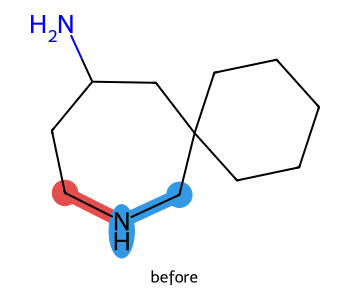

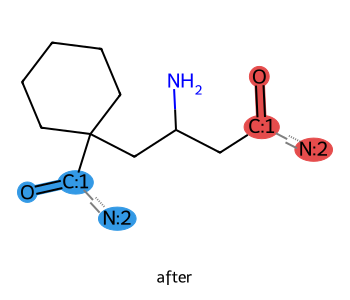

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG, display

# ---------- helpers -------------------------------------------------
def highlight_matches(mol, smarts, palette=None):
    patt = Chem.MolFromSmarts(smarts)
    matches = mol.GetSubstructMatches(patt, uniquify=True)

    if palette is None:
        palette = [(0.9, 0.3, 0.3), (0.2, 0.6, 0.9),
                   (0.3, 0.8, 0.4), (0.9, 0.6, 0.2)]

    hit_atoms, hit_bonds = [], []
    atom_cols, bond_cols = {}, {}

    for i, match in enumerate(matches):
        color = palette[i % len(palette)]
        # mark atoms
        for idx in match:
            hit_atoms.append(idx)
            atom_cols[idx] = color
        # mark bonds along the path (edges between consecutive atoms)
        for j in range(len(match) - 1):
            bond = mol.GetBondBetweenAtoms(match[j], match[j + 1])
            if bond:
                hit_bonds.append(bond.GetIdx())
                bond_cols[bond.GetIdx()] = color

    return hit_atoms, hit_bonds, atom_cols, bond_cols


def draw_molecule(mol, highlight_atoms=None, highlight_bonds=None,
                  highlight_atom_colors=None, highlight_bond_colors=None,
                  legend="", size=(350, 300)):
    d = rdMolDraw2D.MolDraw2DSVG(size[0], size[1])
    rdMolDraw2D.PrepareAndDrawMolecule(
        d, mol,
        legend=legend,
        highlightAtoms=highlight_atoms or [],
        highlightBonds=highlight_bonds or [],
        highlightAtomColors=highlight_atom_colors or {},
        highlightBondColors=highlight_bond_colors or {}
    )
    d.FinishDrawing()
    return SVG(d.GetDrawingText())


# ---------- example -------------------------------------------------
smi = smiles[0]
mol = Chem.MolFromSmiles(smi)

# pattern for CH2–NH2
patt_orig = "[CH2]-[NX3]"
# replacement fragment inserts carbonyl between :1 and :2
repl = Chem.MolFromSmarts("[C:1](=O)[N:2]")

# transform all eligible CH2–NH2 groups at once
product = Chem.ReplaceSubstructs(
    mol, Chem.MolFromSmarts(patt_orig), repl, replaceAll=True
)[0]

# collect highlights
ha1, hb1, ac1, bc1 = highlight_matches(mol, patt_orig)
ha2, hb2, ac2, bc2 = highlight_matches(product, "[C:1](=O)[N:2]")

# draw and display
before_svg = draw_molecule(mol, ha1, hb1, ac1, bc1, legend="before")
after_svg = draw_molecule(product, ha2, hb2, ac2, bc2, legend="after")

display(before_svg, after_svg)

In [228]:
from rdkit import Chem
from rdkit.Chem import AllChem

# 1)  pattern and replacement – exactly what you already wrote
patt = Chem.MolFromSmarts('[NH2]')                    # primary amine N
repl = Chem.MolFromSmarts('[NX3][CX3](=[OX1])')      # N-C(=O)

def enumerate_amide_variants(smi):
    """
    Return a list of molecules in which 0, 1, … all –NH2 groups have been
    converted to amides.  Works for any number of NH2 sites.
    """
    parent = Chem.MolFromSmiles(smi)
    seen   = {Chem.MolToSmiles(parent)}      # 0-substitution case
    queue  = [parent]                        # breadth-first enumeration

    while queue:
        mol = queue.pop()
        # Replace **one** NH2 at a time:
        for prod in AllChem.ReplaceSubstructs(mol, patt, repl,
                                              replaceAll=False):   # ≤1 per product
            prod = prod  # tuple→mol
            smi = Chem.MolToSmiles(prod, isomericSmiles=True)
            if smi not in seen:              # new combination found
                seen.add(smi)
                queue.append(prod)           # try to acylate another NH2 later
    # return molecules in a deterministic order
    return [Chem.MolFromSmiles(s) for s in sorted(seen)]

# --------------------------------------------------------------------
# quick demo
library = [
    "NCCN",                         # two NH2 groups
    "NC1CCC2CCNC1CC2",              # your bicyclic example
    "CC(=O)N"                       # already an amide → only one variant
]

for smi in library:
    variants = enumerate_amide_variants(smi)
    print(f"{smi}  →  {len(variants)} variant(s)")
    for v in variants:
        print("   ", Chem.MolToSmiles(v))

[16:41:05] 

****
Pre-condition Violation
getNumImplicitHs() called without preceding call to calcImplicitValence()
Violation occurred on line 303 in file /Users/runner/miniforge3/conda-bld/rdkit-meta_1745736812121/work/Code/GraphMol/Atom.cpp
Failed Expression: d_implicitValence > -1
****



RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 303 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2025.03.2
	BOOST: 
